In [1]:
import os


In [2]:
cd ../

C:\Users\wmata\OneDrive\Documents\University\Year2\IML\IML.HUJI


In [3]:
from IMLearn.utils import split_train_test
from IMLearn.learners.regressors import LinearRegression
import plotly.io as pio

from typing import NoReturn
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import random
from typing import Tuple
pio.templates.default = "simple_white"

In [17]:
def load_data(filename: str):
    """
    Load house prices dataset and preprocess data.
    Parameters
    ----------
    filename: str
        Path to house prices dataset

    Returns
    -------
    Design matrix and response vector (prices) - either as a single
    DataFrame or a Tuple[DataFrame, Series]
    """
    
    df = pd.read_csv(r"C:\Users\wmata\OneDrive\Documents\University\Year2\IML\IML.HUJI\datasets\house_prices.csv")
    df = pd.read_csv(filename)
    
    # Ceaning the data:
    df = df[(df.price > 0) & (df.bathrooms > 0) & (df.bedrooms > 0) & (df.sqft_lot15 > 0)]  # removing weird values
    df = pd.concat([df, pd.get_dummies(df.zipcode, drop_first = True)], axis = 1)
    
    df = df.drop(['date', 'id', 'zipcode'], 1) # Unecesary columns
    df = df.dropna().reset_index()
    df = df.drop(['index'], 1)
    
    y = df.price
    X = df.drop(["price"], 1)
    return X, y


In [37]:
def feature_evaluation(X: pd.DataFrame, y: pd.Series, output_path: str = ".") -> NoReturn:
    """
    Create scatter plot between each feature and the response.
        - Plot title specifies feature name
        - Plot title specifies Pearson Correlation between feature and response
        - Plot saved under given folder with file name including feature name
    Parameters
    ----------
    X : DataFrame of shape (n_samples, n_features)
        Design matrix of regression problem

    y : array-like of shape (n_samples, )
        Response vector to evaluate against

    output_path: str (default ".")
        Path to folder in which plots are saved
    """
    plot_feature_corrolation("sqft_living", X, y, output_path)
    plot_feature_corrolation("bedrooms", X, y, output_path)
    plot_feature_corrolation("grade", X, y, output_path)
    plot_feature_corrolation("condition", X, y, output_path)
    
    


In [38]:
def plot_feature_corrolation(feature: str, X: pd.DataFrame, y: pd.Series, output_path: str = ".") -> NoReturn:
    x = X[feature]
    cov_matrix = np.cov(x, y)
    cov = cov_matrix[0][1]
    sig_x = np.sqrt(cov_matrix[0][0])
    sig_y = np.sqrt(cov_matrix[1][1])
    corr = cov / (sig_x * sig_y)
    
    graph = px.scatter(x=X[feature], y=y, 
               title = f"{feature} corrolation to price is: {corr.round(4)}", 
               labels = dict(x = feature, y = "price"))
    # pio.write_image(graph, f"{output_path}/{feature}.png", format = "png")
    graph.show()



In [20]:
def split_train_test(X: pd.DataFrame, y: pd.Series, train_proportion: float = .75) \
        -> Tuple[pd.DataFrame, pd.Series, pd.DataFrame, pd.Series]:
    """
    Randomly split given sample to a training- and testing sample

    Parameters
    ----------
    X : DataFrame of shape (n_samples, n_features)
        Data frame of samples and feature values.

    y : Series of shape (n_samples, )
        Responses corresponding samples in data frame.

    train_proportion: Fraction of samples to be split as training set

    Returns
    -------
    train_X : DataFrame of shape (ceil(train_proportion * n_samples), n_features)
        Design matrix of train set

    train_y : Series of shape (ceil(train_proportion * n_samples), )
        Responses of training samples

    test_X : DataFrame of shape (floor((1-train_proportion) * n_samples), n_features)
        Design matrix of test set

    test_y : Series of shape (floor((1-train_proportion) * n_samples), )
        Responses of test samples

    """
    
    permut = np.random.permutation(X.shape[0])
    X = X.iloc[permut]
    y = y.iloc[permut]
    
    train_end_index = int(X.shape[0] * train_proportion) + 1
    return X[:train_end_index] , y[:train_end_index], X[train_end_index:], y[train_end_index:]

In [8]:
np.random.seed(0)
# Question 1 - Load and preprocessing of housing prices dataset
X, y = load_data(r"datasets\house_prices.csv")


C:\Users\wmata\anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:22: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
C:\Users\wmata\anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
C:\Users\wmata\anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


In [21]:

# Question 2 - Feature evaluation with respect to response
feature_evaluation(X,y)



In [22]:
# Question 3 - Split samples into training- and testing sets.
X_train, y_train, X_test, y_test = split_train_test(X, y, .75)


In [23]:
# Question 4 - Fit model over increasing percentages of the overall training data
# For every percentage p in 10%, 11%, ..., 100%, repeat the following 10 times:
#   1) Sample p% of the overall training data
#   2) Fit linear model (including intercept) over sampled set
#   3) Test fitted model over test set
#   4) Store average and variance of loss over test set
# Then plot average loss as function of training size with error ribbon of size (mean-2*std, mean+2*std)
    
model = LinearRegression()

loss_means = np.zeros(91)
loss_std = np.zeros(91)

for i in range(10, 101):
    p = 0.01 * i
    loss = np.zeros(10)
    for j in range(10):
        sample_X = X_train.sample(frac=p)
        sample_y = y_train[sample_X.index]
        model._fit(sample_X.to_numpy(), sample_y.to_numpy())
        loss[j] = model._loss(X_test.to_numpy(), y_test.to_numpy())

    loss_means[i-10] = np.mean(loss)
    loss_std[i-10] = np.std(loss)



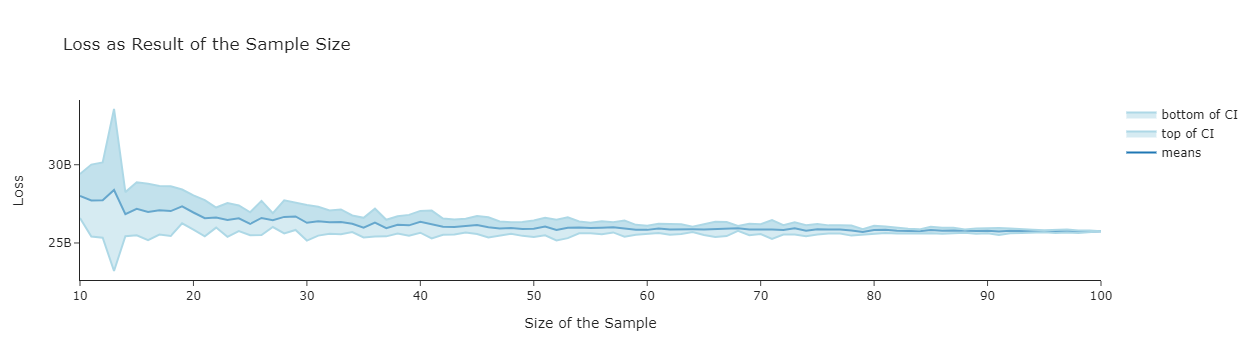

In [24]:

graph = go.Figure(go.Scatter( x=list(range(10, 101)), y = loss_means, name = "means"))
graph.add_traces([go.Scatter( x=list(range(10, 101)), y = loss_means + 2*loss_std, fill="tonexty", mode = "lines", line = dict(color= "lightblue"), name= "top of CI"),
                go.Scatter( x=list(range(10, 101)), y = loss_means - 2*loss_std, fill="tonexty", mode = "lines", line = dict(color= "lightblue"), name= "bottom of CI")])
graph.update_layout(
    title = "Loss as Result of the Sample Size",
    xaxis_title = "Size of the Sample",
    yaxis_title = "Loss",
    legend_title = None)
graph.show()   

In [28]:
np.random.seed(0)
# Question 1 - Load and preprocessing of housing prices dataset
X, y = load_data(r"datasets\house_prices.csv")

C:\Users\wmata\anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:22: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\wmata\anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:24: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only

C:\Users\wmata\anaconda3\envs\iml.env\lib\site-packages\ipykernel_launcher.py:27: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



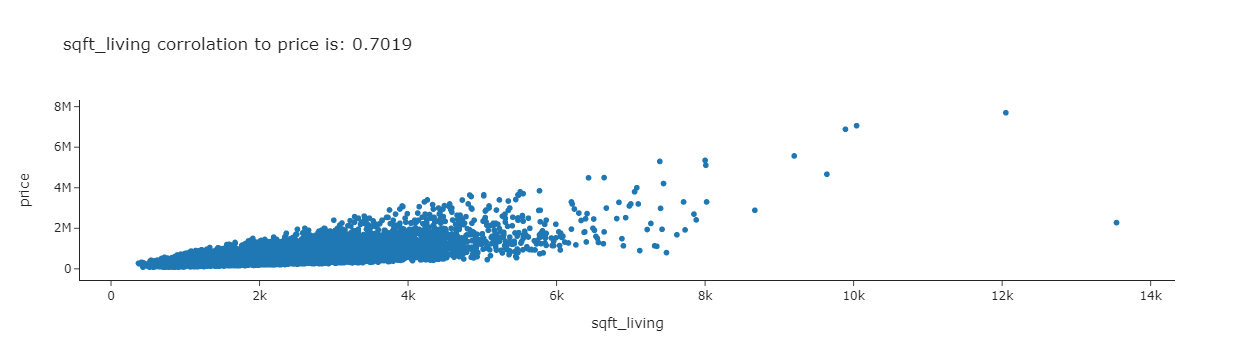

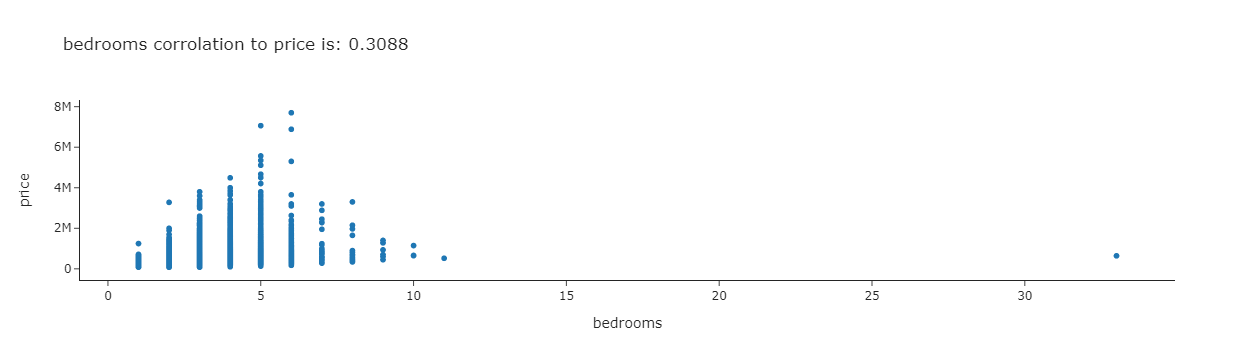

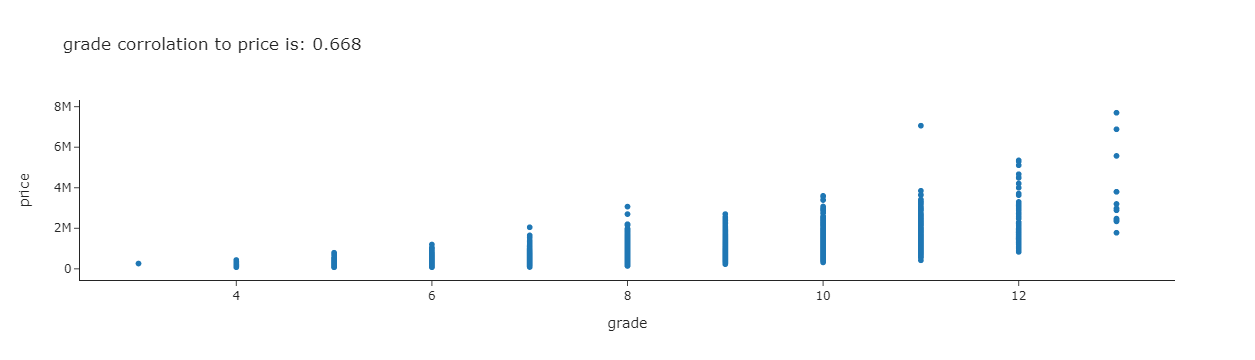

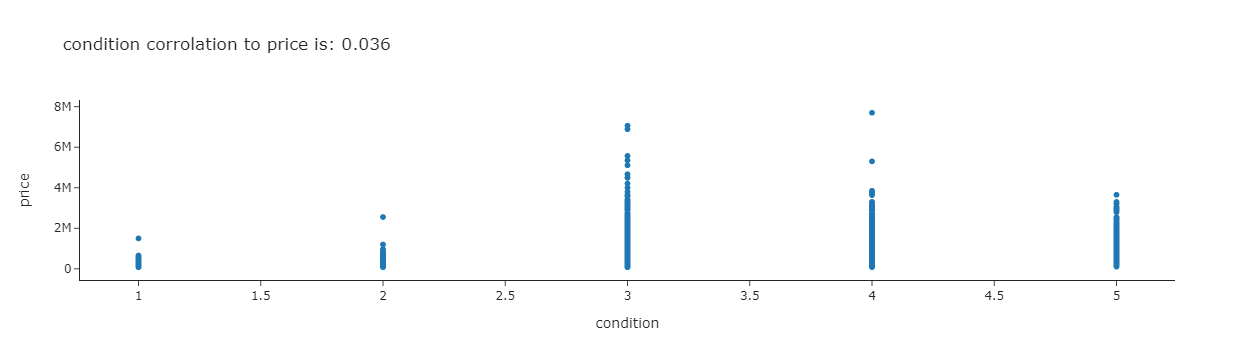

In [39]:
# Question 2 - Feature evaluation with respect to response
feature_evaluation(X,y)

In [40]:
y_true = np.array([279000, 432000, 326000, 333000, 437400, 555950])
y_pred = np.array([199000.37562541, 452589.25533196, 345267.48129011, 345856.57131275, 563867.1347574, 395102.94362135])
mean_square_error(y_true, y_pred)

NameError: name 'mean_square_error' is not defined